In [ ]:
#CS4410
#London Bryant
#MNIST with no alterations
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
y_train.shape

(60000,)

In [ ]:
y_test.shape

(10000,)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

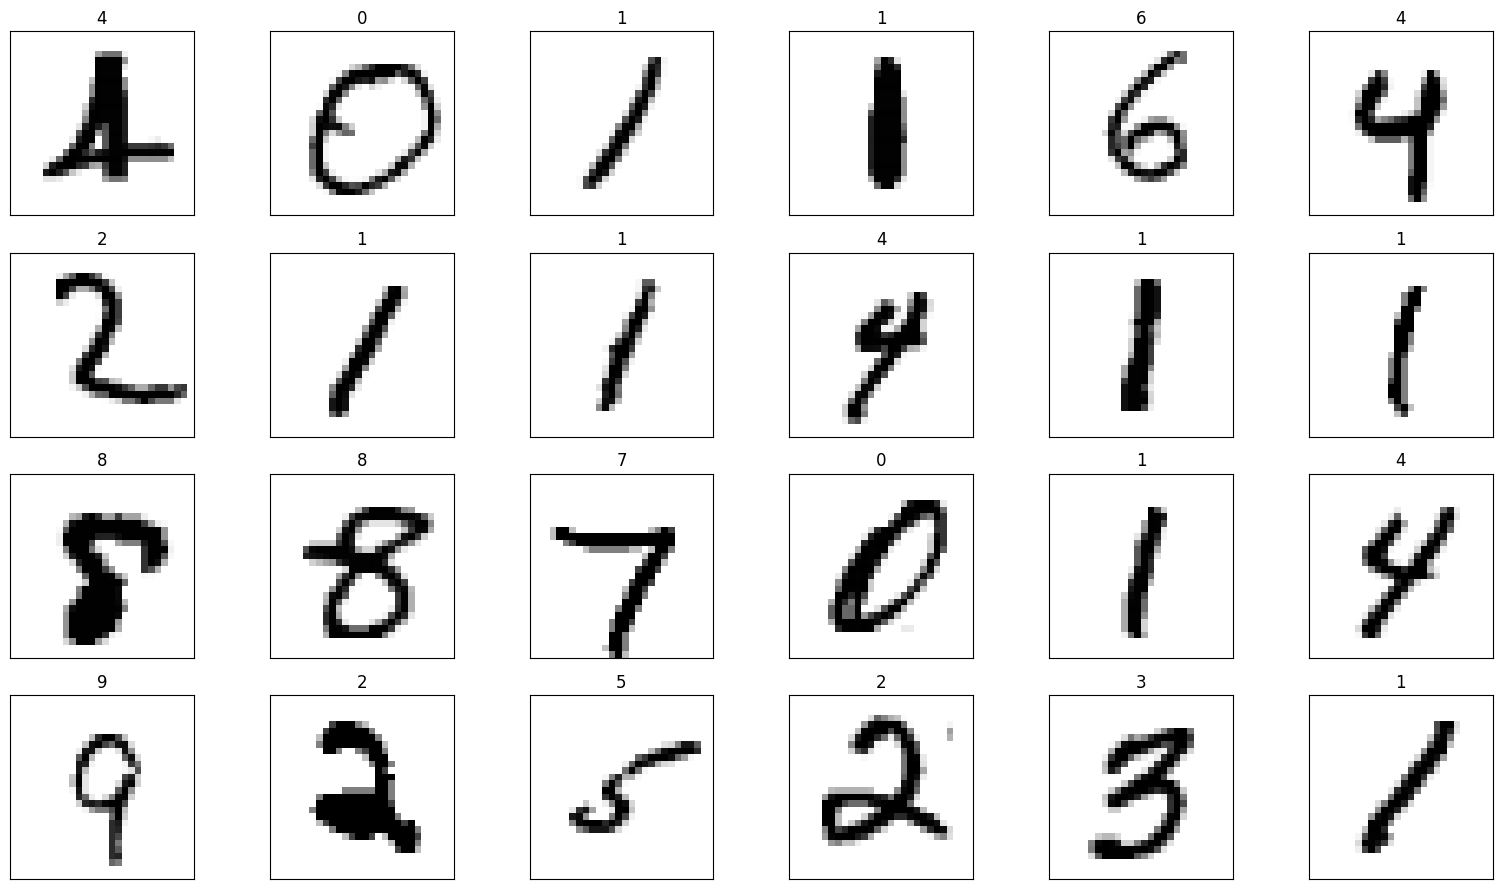

In [ ]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)  # 24 indices
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)

plt.tight_layout()

In [ ]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_test = X_test.reshape((10000, 28, 28, 1))
X_test.shape

(10000, 28, 28, 1)

In [ ]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_train.shape

(60000, 10)

In [ ]:
y_train[0]  # one sample’s categorical data
y_test = to_categorical(y_test)
y_test.shape

(10000, 10)

In [ ]:
from tensorflow.keras.models import Sequential
cnn = Sequential()

In [ ]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [ ]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu',
               input_shape=(28, 28, 1)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
cnn.add(Flatten())

In [ ]:
cnn.add(Dense(units=128, activation='relu'))

In [ ]:
cnn.add(Dense(units=10, activation='softmax'))

In [ ]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,384,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,386,506 (5.29 MB)

 Trainable params: 1,386,506 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

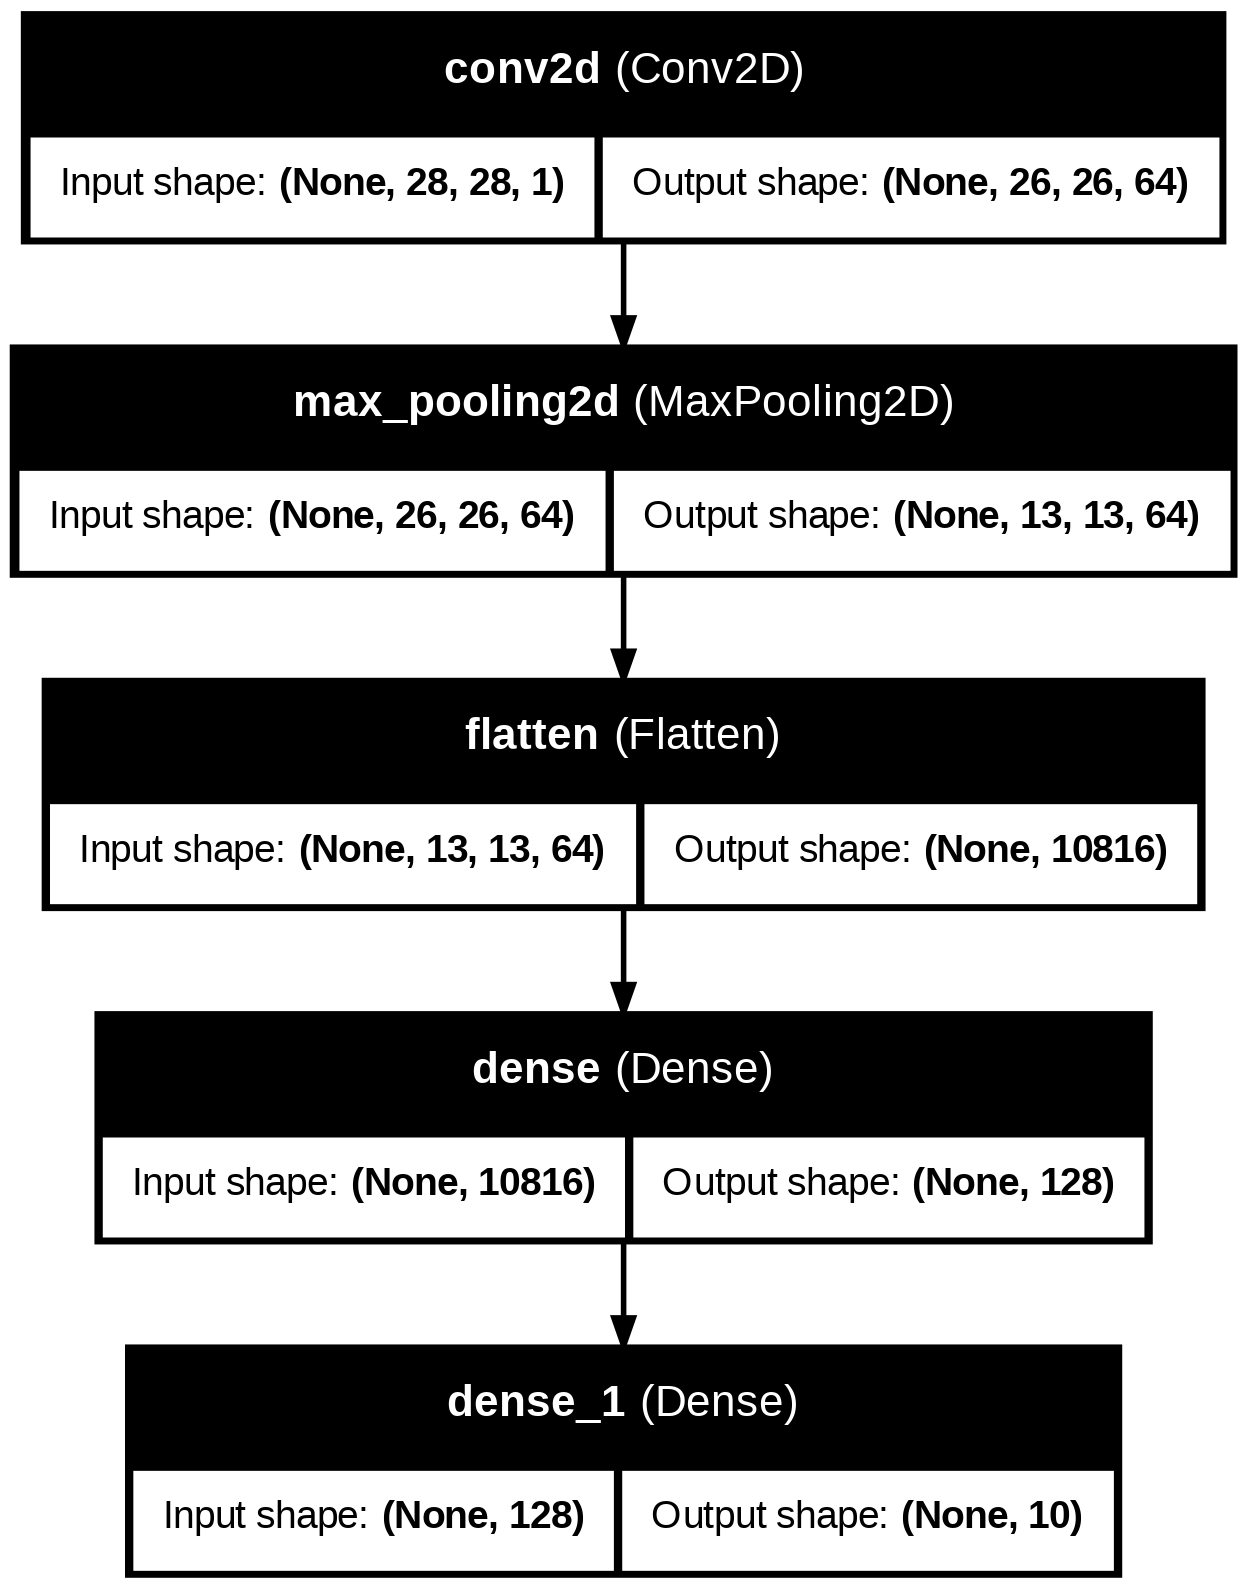

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True,
           show_layer_names=True)
Image(filename='convnet.png')  # display resulting image in notebook

In [ ]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 77s 87ms/step - accuracy: 0.9032 - loss: 0.3353 - val_accuracy: 0.9790 - val_loss: 0.0716
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 70s 83ms/step - accuracy: 0.9825 - loss: 0.0579 - val_accuracy: 0.9858 - val_loss: 0.0535
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.9891 - loss: 0.0367 - val_accuracy: 0.9848 - val_loss: 0.0523
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 78s 78ms/step - accuracy: 0.9916 - loss: 0.0264 - val_accuracy: 0.9873 - val_loss: 0.0499
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 70s 83ms/step - accuracy: 0.9950 - loss: 0.0159 - val_accuracy: 0.9895 - val_loss: 0.0442


In [ ]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9848 - loss: 0.0518


In [ ]:
loss

0.04360968619585037

In [ ]:
accuracy

0.9871000051498413

In [ ]:
predictions = cnn.predict(X_test)
y_test[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [ ]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000000182%
1: 0.0000002911%
2: 0.0000026361%
3: 0.0000179675%
4: 0.0000000061%
5: 0.0000000005%
6: 0.0000000000%
7: 99.9999701977%
8: 0.0000007360%
9: 0.0000024001%


In [ ]:
images = X_test.reshape((10000, 28, 28))

In [ ]:
incorrect_predictions = []

In [ ]:
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:  # prediction was incorrect
        incorrect_predictions.append(
            (i, images[i], predicted, expected))

In [ ]:
len(incorrect_predictions)

129

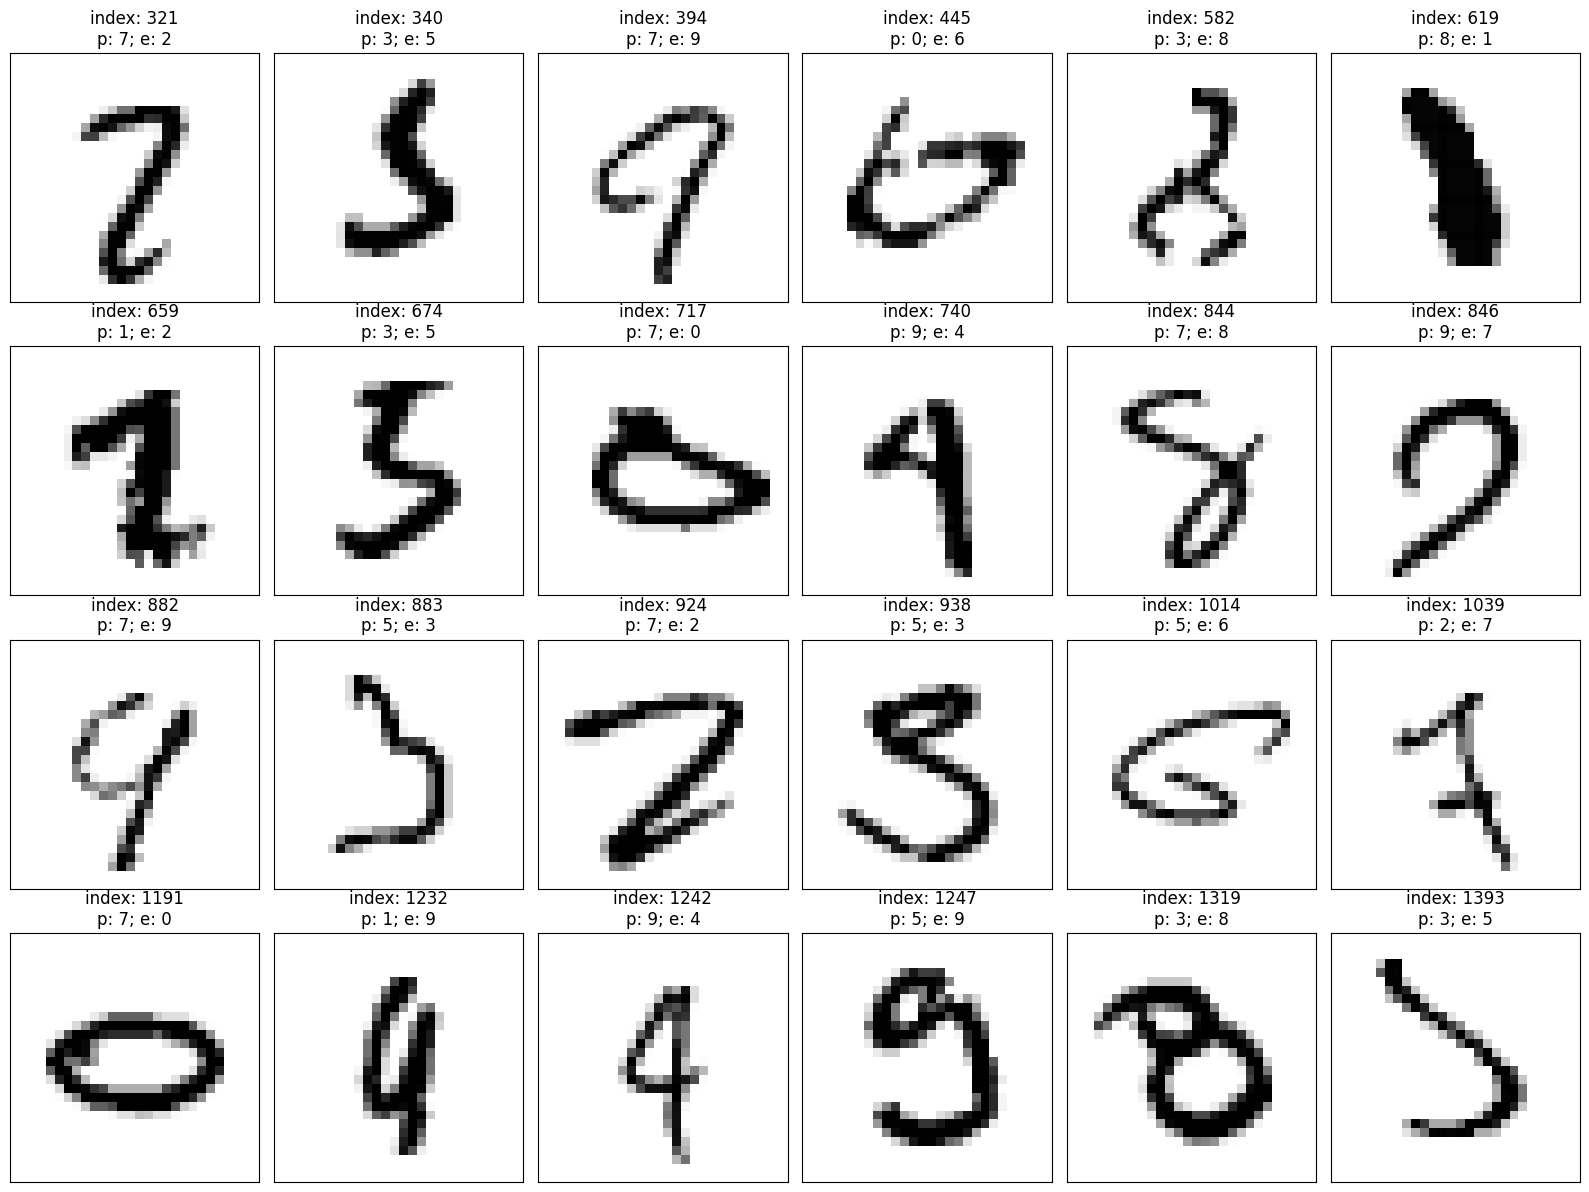

In [ ]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [ ]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [ ]:
display_probabilities(predictions[340])

0: 0.0000000203%
1: 0.0081841681%
2: 0.0000233911%
3: 99.5731711388%
4: 0.0000011145%
5: 0.4174246453%
6: 0.0011000180%
7: 0.0000018078%
8: 0.0000497921%
9: 0.0000363496%


In [ ]:
display_probabilities(predictions[740])

0: 0.0001568927%
1: 0.0061918290%
2: 0.0158167124%
3: 0.0054509404%
4: 45.5247104168%
5: 0.0014285251%
6: 0.0000001206%
7: 0.0472832500%
8: 0.1184152323%
9: 54.2805373669%


In [ ]:
display_probabilities(predictions[1260])

0: 0.0004339814%
1: 19.8184475303%
2: 0.2040775958%
3: 0.0365893269%
4: 0.0004884687%
5: 0.0001213137%
6: 0.0000029061%
7: 79.7171413898%
8: 0.2053530421%
9: 0.0173464214%
